In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

print('done1')

done1


In [2]:
data = pd.read_csv("final_data.csv")
display(data.head(n=5))
print(data.shape)

transaction_id product_id                  product_description  \
0         536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1         536365      71053                  WHITE METAL LANTERN   
2         536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3         536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4         536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   

   quantity_sold transaction_timestamp  unit_price  customer_id  \
0              6      01-12-2010 08:26        2.55        17850   
1              6      01-12-2010 08:26        3.39        17850   
2              8      01-12-2010 08:26        2.75        17850   
3              6      01-12-2010 08:26        3.39        17850   
4              6      01-12-2010 08:26        3.39        17850   

  transaction_country        date   day_name  day_of_month month_of_year  \
0      United Kingdom  01-12-2010  Wednesday             1      December   
1      United Kingdom  01-12-2010  Wednesday             1      December   
2      United Kingdom  01-12-2010  Wednesday             1      December   
3      United Kingdom  01-12-2010  Wednesday             1      December   
4      United Kingdom  01-12-2010  Wednesday             1      December   

  time_of_day(hh:mm:ss)  
0              08:26:00  
1              08:26:00  
2              08:26:00  
3              08:26:00  
4              08:26:00

(401604, 13)


In [3]:
data['TotalPrice'] = data['unit_price'] * data['quantity_sold']

In [4]:
print(type(data))



<class 'pandas.core.frame.DataFrame'>


In [5]:
data.isnull().any()

transaction_id           False
product_id               False
product_description      False
quantity_sold            False
transaction_timestamp    False
unit_price               False
customer_id              False
transaction_country      False
date                     False
day_name                 False
day_of_month             False
month_of_year            False
time_of_day(hh:mm:ss)    False
TotalPrice               False
dtype: bool

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 14 columns):
transaction_id           401604 non-null object
product_id               401604 non-null object
product_description      401604 non-null object
quantity_sold            401604 non-null int64
transaction_timestamp    401604 non-null object
unit_price               401604 non-null float64
customer_id              401604 non-null int64
transaction_country      401604 non-null object
date                     401604 non-null object
day_name                 401604 non-null object
day_of_month             401604 non-null int64
month_of_year            401604 non-null object
time_of_day(hh:mm:ss)    401604 non-null object
TotalPrice               401604 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 42.9+ MB


In [7]:
data.describe()


quantity_sold     unit_price    customer_id   day_of_month  \
count  401604.000000  401604.000000  401604.000000  401604.000000   
mean       12.183273       3.474064   15281.160818      15.038623   
std       250.283037      69.764035    1714.006089       8.652640   
min    -80995.000000       0.000000   12346.000000       1.000000   
25%         2.000000       1.250000   13939.000000       7.000000   
50%         5.000000       1.950000   15145.000000      15.000000   
75%        12.000000       3.750000   16784.000000      22.000000   
max     80995.000000   38970.000000   18287.000000      31.000000   

          TotalPrice  
count  401604.000000  
mean       20.613638  
std       430.352218  
min   -168469.600000  
25%         4.250000  
50%        11.700000  
75%        19.800000  
max    168469.600000

In [8]:
data1 = data.loc[data['quantity_sold'] < 0 ]
data2 = data.loc[data['quantity_sold'] >= 0 ]
print(data1.shape[0]+data2.shape[0])


401604


In [9]:
data['order_canceled'] = data['transaction_id'].apply(lambda x:int('C' in x))
n1 = data['order_canceled'].sum()
print(n1)
n2 = data.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

8872
Number of orders canceled: 8872/401604 (2.21%) 


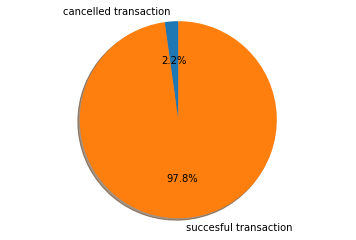

In [10]:
labels = 'cancelled transaction','succesful transaction'
sizes = [data1.shape[0],data2.shape[0]]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



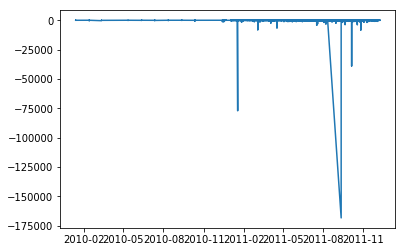

In [11]:
data1["date"] = pd.to_datetime(data1["date"])  
plt.plot(data1['date'],data1['TotalPrice'])

In [12]:
data["date"] = pd.to_datetime(data["date"])  
def scatter_plot(var, color):
    trace = go.Scatter(
        x=var.index[::-1],
        y=var.values[::-1],
        showlegend=False,
        marker=dict(
            color=color)
    )
    return trace



var = data.groupby(data['date'])['quantity_sold'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])

var.columns = ["cancelled", "sold"]

trace2 = scatter_plot(var["cancelled"], 'grey')
trace1 = scatter_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')



In [13]:



var = data.groupby(data['date'])['TotalPrice'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])

var.columns = ["cancelled", "sold"]

trace2 = scatter_plot(var["cancelled"], 'grey')
trace1 = scatter_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')



In [14]:
data1 = data.loc[data['quantity_sold'] > 5000 ]
data2 = data.loc[data['quantity_sold'] < -5000 ]
display(data1.head())
display(data2.head())



transaction_id product_id             product_description  \
37511          541431      23166  MEDIUM CERAMIC TOP STORAGE JAR   
374208         578841      84826  ASSTD DESIGN 3D PAPER STICKERS   
401131         581483      23843     PAPER CRAFT , LITTLE BIRDIE   

        quantity_sold transaction_timestamp  unit_price  customer_id  \
37511           74215      18-01-2011 10:01        1.04        12346   
374208          12540      25-11-2011 15:57        0.00        13256   
401131          80995      09-12-2011 09:15        2.08        16446   

       transaction_country       date day_name  day_of_month month_of_year  \
37511       United Kingdom 2011-01-18  Tuesday            18       January   
374208      United Kingdom 2011-11-25   Friday            25      November   
401131      United Kingdom 2011-09-12   Friday             9      December   

       time_of_day(hh:mm:ss)  TotalPrice  order_canceled  
37511               10:01:00     77183.6               0  
374208              15:57:00         0.0               0  
401131              09:15:00    168469.6               0

transaction_id product_id                  product_description  \
3041          C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR   
37516         C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR   
401132        C581484      23843          PAPER CRAFT , LITTLE BIRDIE   

        quantity_sold transaction_timestamp  unit_price  customer_id  \
3041            -9360      02-12-2010 14:23        0.03        15838   
37516          -74215      18-01-2011 10:17        1.04        12346   
401132         -80995      09-12-2011 09:27        2.08        16446   

       transaction_country       date  day_name  day_of_month month_of_year  \
3041        United Kingdom 2010-02-12  Thursday             2      December   
37516       United Kingdom 2011-01-18   Tuesday            18       January   
401132      United Kingdom 2011-09-12    Friday             9      December   

       time_of_day(hh:mm:ss)  TotalPrice  order_canceled  
3041                14:23:00      -280.8               1  
37516               10:17:00    -77183.6               1  
401132              09:27:00   -168469.6               1

In [15]:
data = data[data['quantity_sold'] < 5000]
data = data[data['quantity_sold'] > -5000]
print(data.shape)




(401598, 15)


In [16]:

var = data.groupby(data['date'])['quantity_sold'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])

var.columns = ["cancelled", "sold"]

trace2 = scatter_plot(var["cancelled"], 'grey')
trace1 = scatter_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


In [17]:
data["month_of_year"] = data["date"].dt.month  
var = data.groupby(data['month_of_year'])['quantity_sold'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])

var.columns = ["cancelled", "sold"]

trace2 = scatter_plot(var["cancelled"], 'grey')
trace1 = scatter_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


In [18]:



var = data.groupby(data['day_of_month'])['quantity_sold'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])

var.columns = ["cancelled", "sold"]

trace2 = scatter_plot(var["cancelled"], 'grey')
trace1 = scatter_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


In [19]:

def bar_plot(var, color):
    trace = go.Bar(
        x=var.index[::-1],
        y=var.values[::-1],
        showlegend=False,
        marker=dict(
            color=color)
    )
    return trace



var = data.groupby(data['day_name'])['quantity_sold'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])

var.columns = ["cancelled", "sold"]

trace2 = bar_plot(var["cancelled"], 'grey')
trace1 = bar_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


In [20]:




var = data.groupby(data['time_of_day(hh:mm:ss)'])['quantity_sold'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])

var.columns = ["cancelled", "sold"]

trace2 = scatter_plot(var["cancelled"], 'grey')
trace1 = scatter_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


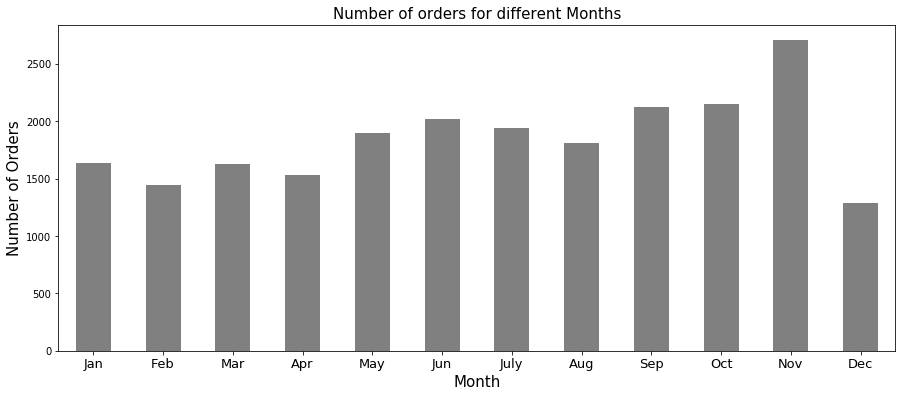

In [40]:
ax = data.groupby('transaction_id')['month_of_year'].unique().value_counts().sort_index().plot('bar',color='grey',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months',fontsize=15)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
plt.show()

[Friday]       3353
[Monday]       3512
[Sunday]       2342
[Thursday]     4977
[Tuesday]      3890
[Wednesday]    4110
Name: day_name, dtype: int64


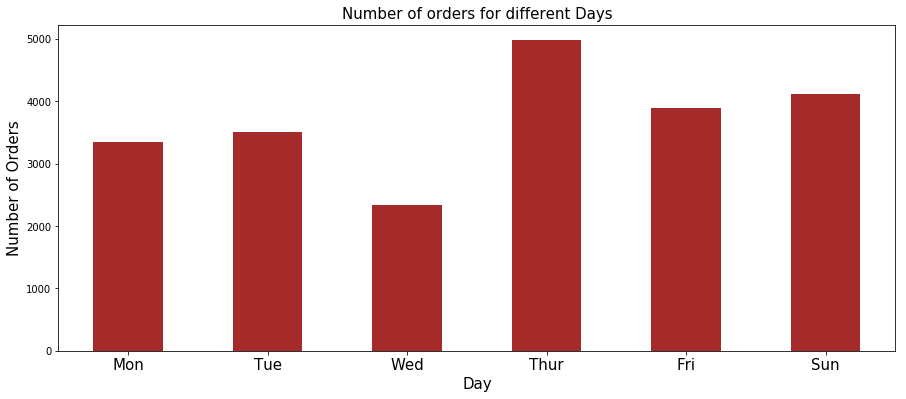

In [43]:
ax = data.groupby('transaction_id')['day_name'].unique().value_counts().sort_index().plot('bar',color='brown',figsize=(15,6))
something =data.groupby('transaction_id')['day_name'].unique().value_counts().sort_index()
print(something)
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [23]:
  
def scatter_plot1(x,y, color):
    trace = go.Bar(
        x=x,
        y=y,
        showlegend=False,
        marker=dict(
            color=color)
    )
    return trace



var1 = data.groupby(data['time_of_day(hh:mm:ss)'])['transaction_id'].unique()
x=var1.index[::-1]
y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)
trace2 = scatter_plot1(x,y, 'grey')
py.iplot([trace2],filename='date - quantity cancelled')


In [24]:

var = data.groupby(data['transaction_country'])['TotalPrice'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])


var.columns = ["cancelled", "sold"]

trace2 = bar_plot(var["cancelled"], 'grey')
trace1 = bar_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


In [25]:
var1 = var[var.index != 'United Kingdom']
var1.columns = ["cancelled", "sold"]


trace2 = bar_plot(var1["cancelled"], 'grey')
trace1 = bar_plot(var1["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


In [44]:
from ggplot import *

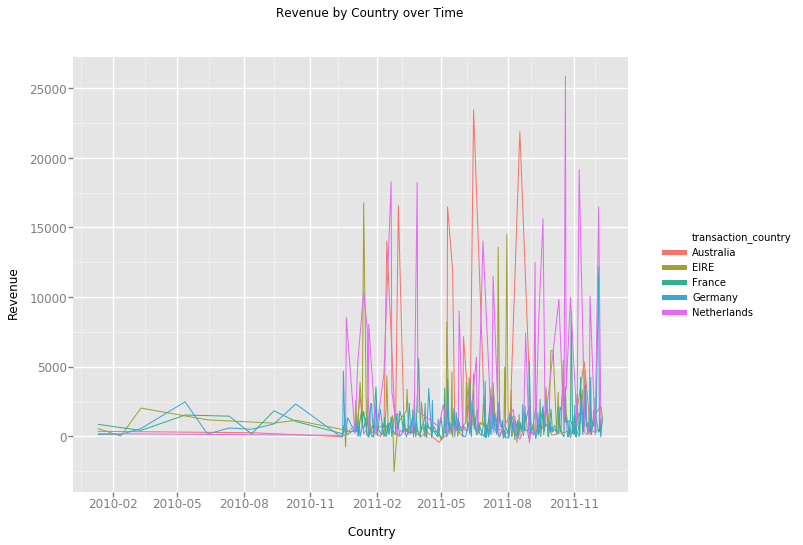

<ggplot: (-9223371879353471772)>

In [47]:
top5countries= data[data['transaction_country'].isin(['Netherlands','EIRE','Germany','France','Australia'])]
summary = top5countries.groupby(['transaction_country','date'],as_index=False).sum()
summary["date"] = pd.to_datetime(summary["date"]) 
ggplot(summary, aes(x ='date', y = 'TotalPrice',color = 'transaction_country'))+geom_line()+ labs(x = ' Country', y = 'Revenue', title = 'Revenue by Country over Time')


In [28]:
var = data.groupby(data['product_description'])['TotalPrice'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])


var.columns = ["cancelled", "sold"]

trace2 = bar_plot(var["cancelled"], 'grey')
trace1 = bar_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')






In [29]:
  
var1 = data.groupby(data['product_description'])['transaction_id'].unique()
x=var1.index[::-1]
y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)

trace2 = scatter_plot1(x,y, 'grey')
py.iplot([trace2],filename='date - quantity cancelled')


In [30]:
  
var1 = data.groupby(data['product_description'])['transaction_country'].unique()
x=var1.index[::-1]
y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)

trace2 = scatter_plot1(x,y, 'brown')
py.iplot([trace2],filename='date - quantity cancelled')


In [48]:
var1 = data.groupby(data['product_description'])['customer_id'].unique()
x=var1.index[::-1]
y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)

trace2 = scatter_plot1(x,y, 'brown')
py.iplot([trace2],filename='date - quantity cancelled')

In [31]:
top6countries= data[data['transaction_country'].isin(['United Kingdoms','Netherlands','EIRE','Germany','France','Australia'])]
var1 = top6countries.groupby(top6countries['product_description'])['transaction_id'].unique()
x=var1.index[::-1]

y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)

trace2 = scatter_plot1(x,y, 'grey')
py.iplot([trace2],filename='date - quantity cancelled')



In [85]:
data_acqu = data.groupby(['customer_id'],as_index=False)['transaction_timestamp'].first()
data_acqu['transaction_timestamp'] =pd.to_datetime(data_acqu['transaction_timestamp'])
data_acqu["date"] = data_acqu['transaction_timestamp'].dt.date


def scatter_plot2(x,y,color):
    trace = go.Scatter(
        x=x,
        y=y,
        showlegend=False,
        marker=dict(
            color=color)
    )
    return trace




var1 = data_acqu.groupby(data_acqu['date'])['customer_id'].unique()

x=var1.index[::-1]
y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)

trace2 = scatter_plot1(x,y,'grey')
py.iplot([trace2],filename='date - quantity cancelled')


In [32]:
customers = data.groupby(data['customer_id'])['transaction_id'].unique()


x=customers.index[::-1]
z=customers.values[::-1]
x=list(x)
z=list(z)
y=[]
for i in z:
    y.append(i.size)
    
customer_transaction = pd.DataFrame(
    {'customer_id': x,
     'no_of_transactions': y
    })

reg_customers = customer_transaction.loc[customer_transaction['no_of_transactions']>5]
print('total no. of customers',len(customer_transaction))
print('regular customers', len(reg_customers))
reg_customers2 = customer_transaction.loc[customer_transaction['no_of_transactions']>10]
print('highly regular customers',len(reg_customers2))

total no. of customers 4370
regular customers 1087
highly regular customers 459


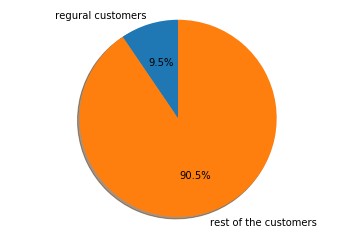

In [62]:
labels = ' regural customers','rest of the customers'
sizes = [len(reg_customers2),len(customer_transaction)]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [33]:
data_reg = data[data['customer_id'].isin(reg_customers['customer_id'])]
data_reg2 = data[data['customer_id'].isin(reg_customers2['customer_id'])]
print(data_reg.shape)
print(data_reg2.shape)

(257221, 15)
(168289, 15)


In [34]:
var1 = data_reg2.groupby(data_reg2['product_description'])['transaction_id'].unique()
x=var1.index[::-1]
y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)

trace2 = scatter_plot1(x,y, 'grey')
py.iplot([trace2],filename='date - quantity cancelled')


In [57]:
data_reg2["date"] = pd.to_datetime(data_reg2["date"])  
var1 = data_reg2.groupby(data_reg2['date'])['customer_id'].unique()

#data_reg["date"] = pd.to_datetime(data_reg["date"])  
#var1 = data_reg.groupby(data_reg['date'])['customer_id'].unique()
x=var1.index[::-1]
y2=var1.values[::-1]
y = []
for i in y2:
    y.append(i.size)

trace2 = scatter_plot1(x,y, 'grey')
py.iplot([trace2],filename='date - quantity cancelled')


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
var1 = data_reg2.groupby(['product_description'])['quantity_sold'].sum()
#print(var1)
x=var1.index[::-1]
y2=var1.values[::-1]
#print(y2)
trace2 = scatter_plot1(x,y2, 'grey')
py.iplot([trace2],filename='date - quantity cancelled')


In [36]:
#print(data_reg2.head())
print(data.shape)
sum1 = data_reg2['TotalPrice'].sum()
sum2 = data['TotalPrice'].sum()
print(sum1/sum2)



(401598, 15)
0.5592491272559224


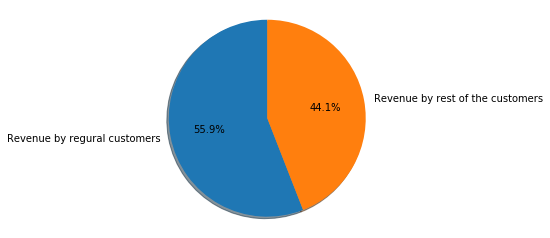

In [60]:
labels = 'Revenue by regural customers','Revenue by rest of the customers'
sizes = [sum1,sum2-sum1]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [37]:
tran_sum = data_reg2['transaction_id'].unique()
print(len(tran_sum))
tran_sum1 = data['transaction_id'].unique()
print(len(tran_sum1))
print(len(tran_sum)/len(tran_sum1))

10113
22184
0.4558690948431302


In [38]:
var = data_reg2.groupby(data_reg2['transaction_country'])['TotalPrice'].agg([('negative' , lambda x : abs(x[x < 0].sum())) , ('positive' , lambda x : x[x > 0].sum())])


var.columns = ["cancelled", "sold"]

trace2 = bar_plot(var["cancelled"], 'grey')
trace1 = bar_plot(var["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')


In [39]:
var1 = var[var.index != 'United Kingdom']
var1.columns = ["cancelled", "sold"]


trace2 = bar_plot(var1["cancelled"], 'grey')
trace1 = bar_plot(var1["sold"], 'orange')
py.iplot([trace1],filename='date - quantity sold')
py.iplot([trace2],filename='date - quantity cancelled')